In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

In [11]:
ratings = pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.data', sep='\t', names=['user_id', 'item_id', 'rating', 'timestamp'])
ratings

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [12]:
users = pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [4]:
movies = pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.item', sep='|', encoding='latin-1', names=['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL'] + [f'genre_{i}' for i in range(19)])
movies

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
occupation= pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.occupation', sep='|', names=['occupation_name'])
occupation

,occupation_name
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [5]:
infos= pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.info', sep='|', names=['number', 'info'])
infos

,number,info
0,943 users,NaN
1,1682 items,NaN
2,100000 ratings,NaN


In [6]:
genre= pd.read_csv('C:/Users/jenny/Desktop/Deree/Intro_Big_Data/Project/ml-100k/u.genre', sep='|', names=['movie_type', 'type_id'])
genre

,movie_type,type_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


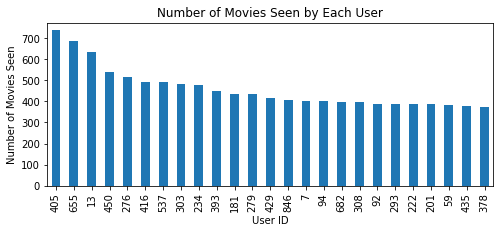

In [9]:
#Step 2
# Basic Descriptive Statistics
# Plot number of movies seen by each user
user_movie_counts = ratings['user_id'].value_counts().head(25)
# head(25) to plot the top 25, because the chart was too crowded, this shows us the top users
plt.figure()
user_movie_counts.plot(kind='bar', figsize=(8,3))
plt.xlabel('User ID')
plt.ylabel('Number of Movies Seen')
plt.title('Number of Movies Seen by Each User')
plt.show()

In [10]:
ratings['user_id'].duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996     True
99997     True
99998     True
99999     True
Name: user_id, Length: 100000, dtype: bool

In [11]:
#a = ratings[ratings[['user_id']].duplicated()]
#a

In [12]:
#We need to count unique rating values per user
#ratings.groupby('user_id')
#ratings['user_id'].unique()
b = ratings.groupby('user_id').nunique()
b

,user_id,item_id,rating,timestamp
user_id,,,,
1,1,272,5,155
2,1,62,5,32
3,1,54,5,19
4,1,24,4,13
5,1,175,5,114
...,...,...,...,...
939,1,49,4,34
940,1,107,5,53
941,1,22,4,10


In [13]:
ratings_copy = ratings.copy()
ratings_copy

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [14]:
ratings_copy.shape

(100000, 4)

In [15]:
ratings_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [16]:
ratings_copy.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [17]:
ratings_copy['rating'].unique()

array([3, 1, 2, 4, 5], dtype=int64)

In [18]:
df = ratings_copy.iloc[: , 0:3]
df

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [19]:
df = df.drop(columns=['item_id'])
df

,user_id,rating
0,196,3
1,186,3
2,22,1
3,244,2
4,166,1
...,...,...
99995,880,3
99996,716,5
99997,276,1
99998,13,2


In [195]:
#df[df['rating'] <2]
#df['rating1'] = (df[df['rating'] <2])
#df['rating2'] = (df['rating'])
#df['rating3'] = (df['rating'])
#df['rating4'] = (df['rating'])
#df['rating5'] = (df['rating'])

In [20]:
df['user_id'].nunique()

943

In [21]:
df.duplicated().sum()

95577

In [22]:
newdf = df.groupby('user_id').count()['rating']
newdf

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: rating, Length: 943, dtype: int64

In [205]:
type(newdf)

pandas.core.series.Series

In [209]:
newdf = newdf.to_frame()

In [210]:
type(newdf)

pandas.core.frame.DataFrame

In [211]:
newdf

,rating
user_id,
1,272
2,62
3,54
4,24
5,175
...,...
939,49
940,107
941,22


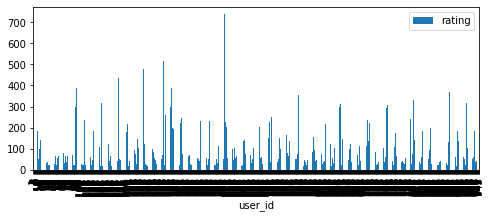

In [215]:
newdf.plot(kind = 'bar', figsize=(8,3))

In [233]:
#random sample of 5%
plotdf = newdf.sample(frac=0.05, replace=False, random_state=1)
plotdf

,rating
user_id,
786,117
95,278
266,23
689,36
860,71
891,47
655,685
405,737
416,493


In [234]:
type(plotdf)

pandas.core.frame.DataFrame

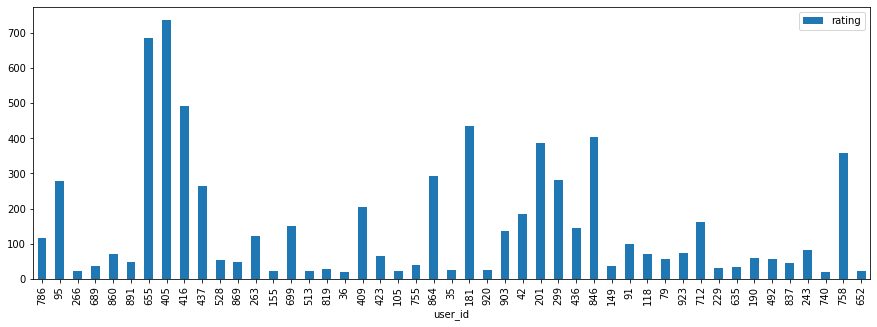

In [236]:
plotdf.plot(kind = 'bar', figsize=(15,5))

In [30]:
user_movie_counts = ratings['user_id'].value_counts()
user_movie_counts

405    737
655    685
13     636
450    540
276    518
      ... 
147     20
19      20
572     20
636     20
895     20
Name: user_id, Length: 943, dtype: int64

In [34]:
#Join ratings and movies
df1 = ratings.join(movies.set_index('movie_id'), on='item_id')
df1

user_id
1      272
2       62
3       54
4       24
5      175
      ... 
939     49
940    107
941     22
942     79
943    168
Name: rating, Length: 943, dtype: int64

In [13]:
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [54]:
#Q3.1 - Matrix preparation
#We convert the dataset into a user-item matrix. Rows = users, columns = movies, values = ratings.
ratings_matrix = ratings.pivot(index='user_id', columns='item_id', values='rating')
ratings_matrix

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
#Q3.1 - Matrix preparation - Optional
#Because the similarity computation requires complete data we replace all the missing values with zeros.
#Report - consine similarity- Να κάνουμε έρευνα για το ότι πρέπει να υπάρχει similarity στα κελιά των δεδομένων μας και επεξήγηση.
ratings_matrix_filled = ratings_matrix.fillna(0)
ratings_matrix_filled

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
ratings_matrix_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 943 entries, 1 to 943
Columns: 1682 entries, 1 to 1682
dtypes: float64(1682)
memory usage: 12.1 MB


In [57]:
#Q3.2
from sklearn.metrics.pairwise import cosine_similarity
 
# Compute cosine similarity between users
user_similarity = cosine_similarity(ratings_matrix_filled)

In [58]:
#Q3.2
# Convert to a DataFrame for readability
#Επεξήγηση του τι βλέπουμε. Similarity μεταξύ χρηστών βάση αριθμού ratings (κοινό rating)
user_similarity_df = pd.DataFrame(user_similarity, index=ratings_matrix.index, columns=ratings_matrix.index)
user_similarity_df.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941


In [ ]:
#Q3.3

In [70]:
def predict_ratings(user_similarity, ratings_matrix_filled):
# Weighted sum of ratings based on similarity
    pred_ratings = np.dot(user_similarity, ratings_matrix_filled)
# Normalize predictions by similarity weights
    pred_ratings /= np.array([np.abs(user_similarity).sum(axis=1)]).T
    return pd.DataFrame(pred_ratings, index=ratings_matrix_filled.index, columns=ratings_matrix_filled.columns)
 
# Predict ratings
predicted_ratings = predict_ratings(user_similarity, ratings_matrix_filled)
 
# Get top 5 recommendations for each user 
def get_top_n_recommendations(predicted_ratings, n=5):
    recommendations = predicted_ratings.apply(lambda row: row.nlargest(n).index.tolist(), axis=1)
    return recommendations
 
top_5_recommendations = get_top_n_recommendations(predicted_ratings, n=5)
print(top_5_recommendations)

user_id
1        [50, 181, 100, 174, 98]
2       [50, 100, 258, 286, 181]
3      [258, 300, 313, 288, 286]
4       [258, 50, 300, 288, 294]
5       [50, 181, 174, 100, 172]
                 ...            
939       [50, 100, 181, 1, 121]
940     [50, 100, 181, 174, 258]
941       [50, 181, 100, 1, 258]
942      [50, 174, 181, 100, 98]
943      [50, 174, 181, 100, 98]
Length: 943, dtype: object


In [71]:
#Q.4
# Create a mask to hide 20% of the data
mask = np.random.rand(*ratings_matrix.shape) < 0.2
hidden_ratings = ratings_matrix[mask]

In [73]:
print(hidden_ratings)

item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
...       ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   
943       NaN   5.0   NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN  ...   

item_id  16